# Imports

---



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

C:\Users\akash\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Make Model

---



In [6]:
def make_model():
    base_model = InceptionResNetV2(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False
    x = base_model.output
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x) 
    x = Dropout(0.3)(x)
    x = Dense(2048, activation='relu')(x) 
    x = Dropout(0.3)(x)
    x = Dense(1024, activation='relu')(x) 
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x) 
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x) 
    x = Dropout(0.3)(x)
    predictions = Dense(6, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [7]:
make_model().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 74, 74, 32)   96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 74, 74, 32)   0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_205

batch_normalization_345 (BatchN (None, 7, 7, 128)    384         conv2d_345[0][0]                 
__________________________________________________________________________________________________
activation_345 (Activation)     (None, 7, 7, 128)    0           batch_normalization_345[0][0]    
__________________________________________________________________________________________________
conv2d_346 (Conv2D)             (None, 7, 7, 160)    143360      activation_345[0][0]             
__________________________________________________________________________________________________
batch_normalization_346 (BatchN (None, 7, 7, 160)    480         conv2d_346[0][0]                 
__________________________________________________________________________________________________
activation_346 (Activation)     (None, 7, 7, 160)    0           batch_normalization_346[0][0]    
__________________________________________________________________________________________________
conv2d_344

# Setting up Input Data Generators

---



In [8]:
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')
    plt.savefig('acc_vs_epochs.png')

In [9]:
train_path = 'data/train/'

In [10]:
valid_path = 'data/valid/'

No data augmentation for now.

In [11]:
train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=0,
      horizontal_flip=False,
      vertical_flip=False
)

In [12]:
valid_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=0,
      horizontal_flip=False,
      vertical_flip=False
)

In [13]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(150, 150), 
                                                    batch_size=32, shuffle=True, seed=42)

Found 13627 images belonging to 6 classes.


In [14]:
valid_generator = valid_datagen.flow_from_directory(valid_path, target_size=(150, 150), 
                                                    batch_size=32, shuffle=True, seed=42)

Found 3407 images belonging to 6 classes.


# Training

---

In [15]:
model = make_model()

In [16]:
model.compile(Adam(lr=0.00001, decay=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
filepath="./checkpoints/" + "VGG16" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
earlystop = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [checkpoint]

In [18]:
history = model.fit_generator(train_generator, 
                              epochs = 10, 
                              steps_per_epoch = 13627 // 32,
                              shuffle = True, 
                              validation_data = valid_generator,
                              validation_steps = 3407 // 32,
                              callbacks = callbacks_list)

Epoch 1/10
425/425 [==============================] - 178s 419ms/step - loss: 1.6006 - acc: 0.3388 - val_loss: 0.8663 - val_acc: 0.6689

Epoch 00001: saving model to ./checkpoints/VGG16_model_weights.h5
Epoch 2/10
425/425 [==============================] - 157s 369ms/step - loss: 1.0814 - acc: 0.5915 - val_loss: 0.6839 - val_acc: 0.8139

Epoch 00002: saving model to ./checkpoints/VGG16_model_weights.h5
Epoch 3/10
425/425 [==============================] - 156s 368ms/step - loss: 0.8363 - acc: 0.6982 - val_loss: 0.7110 - val_acc: 0.8391

Epoch 00003: saving model to ./checkpoints/VGG16_model_weights.h5
Epoch 4/10
425/425 [==============================] - 156s 368ms/step - loss: 0.7228 - acc: 0.7388 - val_loss: 0.6919 - val_acc: 0.8516

Epoch 00004: saving model to ./checkpoints/VGG16_model_weights.h5
Epoch 5/10
425/425 [==============================] - 157s 370ms/step - loss: 0.6503 - acc: 0.7726 - val_loss: 0.7932 - val_acc: 0.8385

Epoch 00005: saving model to ./checkpoints/VGG16_mo

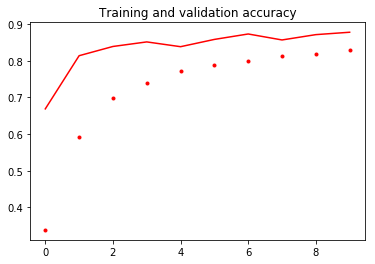

In [21]:
plot_training(history)

In [22]:
import os

In [23]:
test_path = 'data/test'

In [24]:
results = []

In [25]:
for image_name in os.listdir(test_path):
    image_path = test_path + '/' + image_name
    image = load_img(image_path, target_size=(150, 150))
    image = img_to_array(image)
    image = np.array(image)
    image = preprocess_input(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    prediction = np.argmax(model.predict(image))
    results.append({'image_name': image_name, 'label':prediction})

In [26]:
df = pd.DataFrame(results, columns=['image_name', 'label'])

In [27]:
df['label'].value_counts()

3    1418
5    1299
2    1204
0    1156
4    1137
1    1087
Name: label, dtype: int64

In [28]:
df.to_csv("inceptionresnet_big_10epochs_decay.csv", index=False)